In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import layers as k
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import heartpy as hp
import matplotlib.pyplot as plt

# Read in Data

In [2]:
# data_AS = pd.read_csv('finalData/AS_HP_Measures.csv', index_col='Unnamed: 0')
# labels_AS = pd.read_csv('finalData/ascertain_labels_Final.csv').T.values.tolist()[0]

# data_DR = pd.read_csv('finalData/DR_HP_Measures.csv', index_col='Unnamed: 0')
# labels_DR = pd.read_csv('finalData/DREAMER_labels_final.csv').T.values.tolist()[0]

In [3]:
# data_AS = pd.read_csv('finalData/AS_NK_Measures.csv', index_col='Unnamed: 0')
# labels_AS = pd.read_csv('finalData/AS_NK_Labels.csv').values.tolist()[0]

# data_DR = pd.read_csv('finalData/DR_NK_Measures.csv', index_col='Unnamed: 0')
# labels_DR = pd.read_csv('finalData/DR_NK_Labels.csv').values.tolist()[0]

In [4]:
pd.read_csv('finalData/AS_NK_Measures.csv', index_col='Unnamed: 0').shape

(50, 1932)

In [5]:
pd.read_csv('finalData/AS_NK_Measures_filt.csv', index_col='Unnamed: 0').shape

(50, 1932)

In [6]:
data_AS1 = pd.read_csv('finalData/AS_HP_Measures.csv', index_col='Unnamed: 0')
# labels_AS = pd.read_csv('finalData/ascertain_labels_Final.csv').T.values.tolist()[0]

data_DR1 = pd.read_csv('finalData/DR_HP_Measures.csv', index_col='Unnamed: 0')
# labels_DR = pd.read_csv('finalData/DREAMER_labels_final.csv').T.values.tolist()[0]

# data_AS = pd.read_csv('finalData/AS_NK_Measures.csv', index_col='Unnamed: 0')
# data_DR = pd.read_csv('finalData/DR_NK_Measures.csv', index_col='Unnamed: 0')

labels_AS = pd.read_csv('finalData/AS_NK_Labels.csv')
labels_DR = pd.read_csv('finalData/DR_NK_Labels.csv')


data_AS = pd.read_csv('finalData/AS_NK_Measures_filt.csv', index_col='Unnamed: 0')
data_DR = pd.read_csv('finalData/DR_NK_Measures_filt.csv', index_col='Unnamed: 0')

for col in data_AS.columns:
    if col not in data_AS1.columns:
        data_AS = data_AS.drop(col, axis=1)
        labels_AS = labels_AS.drop(col, axis=1)
        
for col in data_DR.columns:
    if col in data_DR1.columns:
        data_DR = data_DR.drop(col, axis=1)
        labels_DR = labels_DR.drop(col, axis=1)
        
labels_DR = labels_DR.values.tolist()[0]
labels_AS = labels_AS.values.tolist()[0]

In [7]:
len(labels_AS)

607

In [8]:
# data_AS

In [9]:
len(labels_AS), data_AS.shape, len(labels_DR), data_DR.shape

(607, (50, 607), 94, (50, 94))

In [10]:
data_AS.head(13)

,P01C1,P01C2,P01C3,P01C4,P01C5,P01C6,P01C7,P01C8,P01C9,P01C10,...,P55C26,P55C28,P55C29,P55C30,P55C31,P55C33,P55C34,P55C35,P55C36,P57C11
RMSSD,39.782695,45.666782,43.414898,55.145343,53.349973,52.779704,32.064167,55.637195,56.725528,29.820378,...,32.319500,46.137639,254.452255,79.845931,41.437019,31.096116,28.868654,123.425673,62.146062,346.866416
MeanNN,808.700372,759.390024,758.858070,804.418999,781.531095,851.117484,775.814194,778.964247,816.432062,749.901396,...,794.604142,777.698114,813.190366,798.795181,793.609375,796.707709,784.659612,842.020581,780.688016,836.743228
SDNN,42.391881,47.694764,57.275022,59.597556,51.286605,41.049307,29.594240,47.164432,43.093205,28.588205,...,52.383307,63.940778,250.656910,70.762835,46.424857,51.359301,62.923831,128.605007,81.962450,249.767951
SDSD,39.831466,45.715153,43.461049,55.206219,53.415984,52.846752,32.096395,55.697999,56.788164,29.849148,...,32.356751,46.186192,254.684566,79.942458,41.478595,31.129398,28.904040,123.561761,62.219150,347.320931
CVNN,0.052420,0.062807,0.075475,0.074088,0.065623,0.048230,0.038146,0.060548,0.052782,0.038123,...,0.065924,0.082218,0.308239,0.088587,0.058498,0.064464,0.080193,0.152734,0.104987,0.298500
CVSD,0.049193,0.060136,0.057211,0.068553,0.068263,0.062012,0.041330,0.071425,0.069480,0.039766,...,0.040674,0.059326,0.312906,0.099958,0.052213,0.039031,0.036791,0.146583,0.079604,0.414543
MedianNN,812.500000,765.625000,769.531250,808.593750,785.156250,847.656250,773.437500,785.156250,808.593750,750.000000,...,792.968750,769.531250,781.250000,785.156250,796.875000,796.875000,796.875000,837.890625,769.531250,800.781250
MadNN,40.539844,28.957031,57.914062,40.539844,40.539844,34.748438,28.957031,40.539844,34.748438,28.957031,...,52.122656,57.914062,28.957031,40.539844,40.539844,52.122656,69.496875,112.932422,75.288281,81.079687
MCVNN,0.049895,0.037821,0.075259,0.050136,0.051633,0.040994,0.037439,0.051633,0.042974,0.038609,...,0.065731,0.075259,0.037065,0.051633,0.050874,0.065409,0.087212,0.134782,0.097837,0.101251
IQRNN,54.687500,42.968750,82.031250,54.687500,54.687500,50.781250,35.156250,50.781250,53.710938,39.062500,...,70.312500,85.937500,42.968750,60.546875,58.593750,74.218750,85.937500,152.343750,101.562500,113.281250


5000

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26f237cb160>,
 0.8907103825136612)

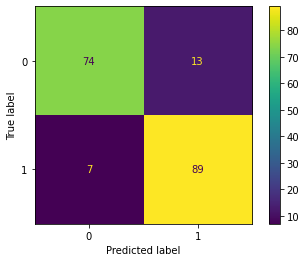

In [11]:
inputIter = 500
numIter = 0
acc = 0
maxAcc = 0
splitTuple = (0,0,0,0)
while(acc<0.95 and numIter< inputIter):
    X_train, X_test, y_train, y_test = train_test_split(data_AS.T, labels_AS, test_size=0.3, stratify=labels_AS)

    rfModel = RandomForestClassifier()
    # rfModel = load('rf.joblib')
    rfModel.fit(X_train, y_train)
    acc = rfModel.score(X_test, y_test)
    numIter += 1
    print('\r' + str(numIter), end='')
    if(acc > maxAcc):
        maxAcc = acc
        splitTuple = (X_train, X_test, y_train, y_test)

plot_confusion_matrix(rfModel, splitTuple[1], splitTuple[3]), rfModel.score(splitTuple[1], splitTuple[3])

In [12]:
rfModel.score(splitTuple[1], splitTuple[3])

0.8907103825136612

5000

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26f18a9a220>,
 0.9655172413793104)

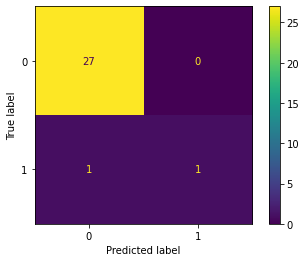

In [13]:
numIter = 0
acc = 0
maxAcc2 = 0
splitTuple2 = (0,0,0,0)
while(acc<0.95 and numIter< inputIter):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(data_DR.T, labels_DR, test_size=0.3, stratify=labels_DR)

    rfModel2 = RandomForestClassifier()
    # rfModel = load('rf.joblib')
    rfModel2.fit(X_train2, y_train2)
    acc = rfModel2.score(X_test2, y_test2)
    numIter += 1
    print('\r' + str(numIter), end='')
    if(acc > maxAcc2):
        maxAcc2 = acc
        splitTuple2 = (X_train2, X_test2, y_train2, y_test2)


plot_confusion_matrix(rfModel2, splitTuple2[1], splitTuple2[3]), rfModel2.score(splitTuple2[1], splitTuple2[3])

In [14]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(rfModel.predict(splitTuple2[1]), splitTuple2[3])

0.5023809523809524

In [15]:
labels_combined = labels_AS + labels_DR
dataCombined = pd.concat([data_AS.T, data_DR.T]).T

5000

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26f23c47850>,
 0.9052132701421801)

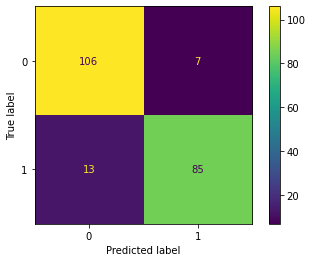

In [16]:
numIter = 0
acc = 0
maxAcc3 = 0
splitTuple3 = (0,0,0,0)
while(acc<0.95 and numIter< inputIter):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(dataCombined.T, labels_combined, test_size=0.3, stratify=labels_combined)

    rfModel3 = RandomForestClassifier()
    # rfModel = load('rf.joblib')
    rfModel3.fit(X_train3, y_train3)
    acc = rfModel3.score(X_test3, y_test3)
    numIter += 1
    print('\r' + str(numIter), end='')
    if(acc > maxAcc3):
        maxAcc3 = acc
        splitTuple3 = (X_train3, X_test3, y_train3, y_test3)

plot_confusion_matrix(rfModel3, splitTuple3[1], splitTuple3[3]), rfModel3.score(splitTuple3[1], splitTuple3[3])

# Model Comparison

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

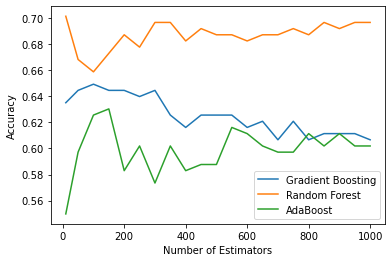

In [18]:
X_train, X_test, y_train, y_test = splitTuple3

numEstimators = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]


gradBoostScores = []
rfScores = []
adaScores = []

for num in numEstimators:
    gradModel = GradientBoostingClassifier(n_estimators=num, random_state=7)
    rfModel = RandomForestClassifier(n_estimators=num, random_state=7)
    adaModel = AdaBoostClassifier(n_estimators=num, random_state=7)

    
    gradModel.fit(X_train, y_train)
    rfModel.fit(X_train, y_train)
    adaModel.fit(X_train, y_train)
    
    scores = gradModel.score(X_test, y_test)
    gradBoostScores.append(scores)
    scores = rfModel.score(X_test, y_test)
    rfScores.append(scores)
    scores = adaModel.score(X_test, y_test)
    adaScores.append(scores)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(numEstimators, gradBoostScores, label = "Gradient Boosting")
ax.plot(numEstimators, rfScores, label = "Random Forest")
ax.plot(numEstimators, adaScores, label="AdaBoost")


plt.legend()

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Accuracy')

plt.show()


In [19]:
# print(max(rfScores))

In [20]:
mlp = MLPClassifier().fit(X_train, y_train)
scoresMLP = mlp.score(X_test, y_test)

scoresMLP

0.47393364928909953

Text(0, 0.5, 'Loss')

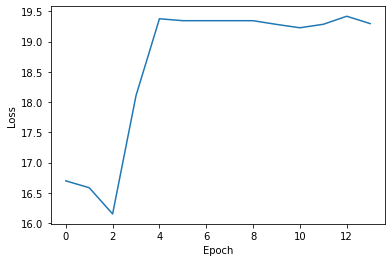

In [21]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')